In [1]:
import os
import math

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=1000)

rd_seed = 333

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix = pd.read_csv(path_file, sep=",", index_col='studium_id') 

In [3]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             4081 non-null   int64  
 1   je_cech                 4081 non-null   int64  
 2   datum_zahajeni          4081 non-null   int64  
 3   rok_maturity            4081 non-null   int64  
 4   maturita_nastup_rozdil  4081 non-null   int64  
 5   gymnazium               4081 non-null   int64  
 6   praha                   4081 non-null   int64  
 7   scio                    4081 non-null   int64  
 8   olym                    4081 non-null   int64  
 9   zkouska                 4081 non-null   int64  
 10  prominuti               4081 non-null   int64  
 11  dostudoval_uspesne      4081 non-null   int64  
 12  BI-PA1                  3918 non-null   float64
 13  BI-PAI                  3894 non-null   float64
 14  BI-CAO                  3840 

In [4]:
matrix

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19374606,0,1,2021,2009,12,1,0,0,1,0,0,0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12375406,0,1,2015,2009,6,0,1,0,0,0,0,1,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,NaN,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,0,1,2015,2009,6,1,0,0,0,0,0,0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12032306,0,1,2015,2007,8,0,1,0,0,0,0,0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15613006,0,1,2018,2009,9,1,1,0,0,0,0,0,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,NaN,2.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814506,0,1,2021,2021,0,1,1,1,1,0,0,0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11677106,0,1,2015,2003,12,0,1,0,0,0,0,0,4.0,2.5,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13513806,0,1,2016,2006,10,0,1,0,0,0,0,0,4.0,4.0,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selekce atributů

In [5]:
matrix = matrix.drop(columns=['dostudoval_uspesne'])

## Doplnění NaN hodnot

In [6]:
imp = KNNImputer(n_neighbors=5)
matrix = pd.DataFrame(imp.fit_transform(matrix), index=matrix.index, columns=matrix.columns)

In [7]:
matrix

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19374606,0.0,1.0,2021.0,2009.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,2.4,4.0,4.0,2.8,3.6,3.0,2.7,3.6,3.7,2.4,3.3,2.9,2.4,2.0,2.3,1.9,2.1,1.8,2.5
12375406,0.0,1.0,2015.0,2009.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,2.9,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,0.0,1.0,2015.0,2009.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.8,3.1,2.6,3.7,3.7,2.8,3.8,3.0,2.5,3.2,2.9,1.1,2.8,2.5
12032306,0.0,1.0,2015.0,2007.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.2,2.7,3.7,3.2,3.8,3.8,2.5,2.6,3.0,2.8,1.4,2.3,3.6
15613006,0.0,1.0,2018.0,2009.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,1.8,2.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814506,0.0,1.0,2021.0,2021.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,3.2,3.8,4.0,3.8,4.0,4.0,3.6,4.0,4.0,4.0,4.0,3.7,3.7,4.0,4.0,3.5,1.1,2.2,2.3
11677106,0.0,1.0,2015.0,2003.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.5,1.0,4.0,4.0,4.0,2.8,3.1,2.5,3.0,2.5,3.0,2.5,2.5,2.4,2.9,2.0,1.8,1.9,2.6
13513806,0.0,1.0,2016.0,2006.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,4.0,4.0,3.1,3.0,2.8,3.3,2.5,3.2,2.6,2.5,2.4,2.9,1.9,1.4,1.8,3.1


## Rozdělení datasetu

In [8]:
train, test = train_test_split(matrix, test_size=0.2)

## Nastavení param_grid 

In [9]:
param_grid = {
    'n_neighbors' : range(5, 20), # Počet nejbližších sousedů
    'weights' : ['uniform', 'distance']
}
param_comb = ParameterGrid(param_grid)

## PA1

In [10]:
Xtrain_pa1 = train.drop(columns='BI-PA1')
ytrain_pa1 = train['BI-PA1']

Xtest_pa1 = test.drop(columns='BI-PA1')
ytest_pa1 = test['BI-PA1']

In [11]:
knn_pa1 = GridSearchCV(KNeighborsRegressor(), param_grid)

In [12]:
knn_pa1.fit(Xtrain_pa1, ytrain_pa1)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [13]:
print(knn_pa1.best_params_)

{'n_neighbors': 11, 'weights': 'distance'}


In [14]:
train_pa1_err = np.sqrt(mean_squared_error(knn_pa1.predict(Xtrain_pa1), np.array(ytrain_pa1)))
test_pa1_err = np.sqrt(mean_squared_error(knn_pa1.predict(Xtest_pa1), np.array(ytest_pa1)))

In [15]:
print('RMSE reg (train):', train_pa1_err)
print('RMSE reg (test):', test_pa1_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5122209146223671


## PAI

In [16]:
Xtrain_pai = train.drop(columns='BI-PAI')
ytrain_pai = train['BI-PAI']

Xtest_pai = test.drop(columns='BI-PAI')
ytest_pai = test['BI-PAI']

In [17]:
knn_pai = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [18]:
knn_pai.fit(Xtrain_pai, ytrain_pai)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [19]:
train_pai_err = np.sqrt(mean_squared_error(knn_pai.predict(Xtrain_pai), np.array(ytrain_pai)))
test_pai_err = np.sqrt(mean_squared_error(knn_pai.predict(Xtest_pai), np.array(ytest_pai)))

In [20]:
print('RMSE reg (train):', train_pai_err)
print('RMSE reg (test):', test_pai_err)

RMSE reg (train): 0.012376844287208429
RMSE reg (test): 0.4654611515622157


## ZMA

In [21]:
Xtrain_zma = train.drop(columns='BI-ZMA')
ytrain_zma = train['BI-ZMA']

Xtest_zma = test.drop(columns='BI-ZMA')
ytest_zma = test['BI-ZMA']

In [22]:
knn_zma = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [23]:
knn_zma.fit(Xtrain_zma, ytrain_zma)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [24]:
train_zma_err = np.sqrt(mean_squared_error(knn_zma.predict(Xtrain_zma), np.array(ytrain_zma)))
test_zma_err = np.sqrt(mean_squared_error(knn_zma.predict(Xtest_zma), np.array(ytest_zma)))

In [25]:
print('RMSE reg (train):', train_zma_err)
print('RMSE reg (test):', test_zma_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.512373190284474


## MLO

In [26]:
Xtrain_mlo = train.drop(columns='BI-MLO')
ytrain_mlo = train['BI-MLO']

Xtest_mlo = test.drop(columns='BI-MLO')
ytest_mlo = test['BI-MLO']

In [27]:
knn_mlo = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [28]:
knn_mlo.fit(Xtrain_mlo, ytrain_mlo)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [29]:
train_mlo_err = np.sqrt(mean_squared_error(knn_mlo.predict(Xtrain_mlo), np.array(ytrain_mlo)))
test_mlo_err = np.sqrt(mean_squared_error(knn_mlo.predict(Xtest_mlo), np.array(ytest_mlo)))

In [30]:
print('RMSE reg (train):', train_mlo_err)
print('RMSE reg (test):', test_mlo_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.52766071511944


## CAO

In [31]:
Xtrain_cao = train.drop(columns='BI-CAO')
ytrain_cao = train['BI-CAO']

Xtest_cao = test.drop(columns='BI-CAO')
ytest_cao = test['BI-CAO']

In [32]:
knn_cao = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [33]:
knn_cao.fit(Xtrain_cao, ytrain_cao)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [34]:
train_cao_err = np.sqrt(mean_squared_error(knn_cao.predict(Xtrain_cao), np.array(ytrain_cao)))
test_cao_err = np.sqrt(mean_squared_error(knn_cao.predict(Xtest_cao), np.array(ytest_cao)))

In [35]:
print('RMSE reg (train):', train_cao_err)
print('RMSE reg (test):', test_cao_err)

RMSE reg (train): 0.024753688574416857
RMSE reg (test): 0.5927173290722959


## PS1

In [36]:
Xtrain_ps1 = train.drop(columns='BI-PS1')
ytrain_ps1 = train['BI-PS1']

Xtest_ps1 = test.drop(columns='BI-PS1')
ytest_ps1 = test['BI-PS1']

In [37]:
knn_ps1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [38]:
knn_ps1.fit(Xtrain_ps1, ytrain_ps1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [39]:
train_ps1_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtrain_ps1), np.array(ytrain_ps1)))
test_ps1_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtest_ps1), np.array(ytest_ps1)))

In [40]:
print('RMSE reg (train):', train_ps1_err)
print('RMSE reg (test):', test_ps1_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5283408707791104


## PA2

In [41]:
Xtrain_pa2 = train.drop(columns='BI-PA2')
ytrain_pa2 = train['BI-PA2']

Xtest_pa2 = test.drop(columns='BI-PA2')
ytest_pa2 = test['BI-PA2']

In [42]:
knn_pa2 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [43]:
knn_pa2.fit(Xtrain_pa2, ytrain_pa2)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [44]:
train_pa2_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtrain_pa2), np.array(ytrain_pa2)))
test_pa2_err = np.sqrt(mean_squared_error(knn_ps1.predict(Xtest_pa2), np.array(ytest_pa2)))

In [45]:
print('RMSE reg (train):', train_pa2_err)
print('RMSE reg (test):', test_pa2_err)

RMSE reg (train): 0.6608506870180393
RMSE reg (test): 0.6675654436014623


## LIN

In [46]:
Xtrain_lin = train.drop(columns='BI-LIN')
ytrain_lin = train['BI-LIN']

Xtest_lin = test.drop(columns='BI-LIN')
ytest_lin = test['BI-LIN']

In [47]:
knn_lin = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [48]:
knn_lin.fit(Xtrain_lin, ytrain_lin)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [49]:
train_lin_err = np.sqrt(mean_squared_error(knn_lin.predict(Xtrain_lin), np.array(ytrain_lin)))
test_lin_err = np.sqrt(mean_squared_error(knn_lin.predict(Xtest_lin), np.array(ytest_lin)))

In [50]:
print('RMSE reg (train):', train_lin_err)
print('RMSE reg (test):', test_lin_err)

RMSE reg (train): 3.808033558317022e-17
RMSE reg (test): 0.3693894560728406


## DBS

In [51]:
Xtrain_dbs = train.drop(columns='BI-DBS')
ytrain_dbs = train['BI-DBS']

Xtest_dbs = test.drop(columns='BI-DBS')
ytest_dbs = test['BI-DBS']

In [52]:
knn_dbs = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [53]:
knn_dbs.fit(Xtrain_dbs, ytrain_dbs)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [54]:
train_dbs_err = np.sqrt(mean_squared_error(knn_dbs.predict(Xtrain_dbs), np.array(ytrain_dbs)))
test_dbs_err = np.sqrt(mean_squared_error(knn_dbs.predict(Xtest_dbs), np.array(ytest_dbs)))

In [55]:
print('RMSE reg (train):', train_dbs_err)
print('RMSE reg (test):', test_dbs_err)

RMSE reg (train): 6.95248626542299e-17
RMSE reg (test): 0.5004322136615167


## SAP

In [56]:
Xtrain_sap = train.drop(columns='BI-SAP')
ytrain_sap = train['BI-SAP']

Xtest_sap = test.drop(columns='BI-SAP')
ytest_sap = test['BI-SAP']

In [57]:
knn_sap = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [58]:
knn_sap.fit(Xtrain_sap, ytrain_sap)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [59]:
train_sap_err = np.sqrt(mean_squared_error(knn_sap.predict(Xtrain_sap), np.array(ytrain_sap)))
test_sap_err = np.sqrt(mean_squared_error(knn_sap.predict(Xtest_sap), np.array(ytest_sap)))

In [60]:
print('RMSE reg (train):', train_sap_err)
print('RMSE reg (test):', test_sap_err)

RMSE reg (train): 1.3508235317673063e-16
RMSE reg (test): 0.6130782625090496


## AAG

In [61]:
Xtrain_aag = train.drop(columns='BI-AAG')
ytrain_aag = train['BI-AAG']

Xtest_aag = test.drop(columns='BI-AAG')
ytest_aag = test['BI-AAG']

In [62]:
knn_aag = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [63]:
knn_aag.fit(Xtrain_aag, ytrain_aag)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [64]:
train_aag_err = np.sqrt(mean_squared_error(knn_aag.predict(Xtrain_aag), np.array(ytrain_aag)))
test_aag_err = np.sqrt(mean_squared_error(knn_aag.predict(Xtest_aag), np.array(ytest_aag)))

In [65]:
print('RMSE reg (train):', train_aag_err)
print('RMSE reg (test):', test_aag_err)

RMSE reg (train): 1.2412670766236366e-16
RMSE reg (test): 0.40980276812693833


## AG1

In [66]:
Xtrain_ag1 = train.drop(columns='BI-AG1')
ytrain_ag1 = train['BI-AG1']

Xtest_ag1 = test.drop(columns='BI-AG1')
ytest_ag1 = test['BI-AG1']

In [67]:
knn_ag1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [68]:
knn_ag1.fit(Xtrain_ag1, ytrain_ag1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [69]:
train_ag1_err = np.sqrt(mean_squared_error(knn_ag1.predict(Xtrain_ag1), np.array(ytrain_ag1)))
test_ag1_err = np.sqrt(mean_squared_error(knn_ag1.predict(Xtest_ag1), np.array(ytest_ag1)))

In [70]:
print('RMSE reg (train):', train_ag1_err)
print('RMSE reg (test):', test_ag1_err)

RMSE reg (train): 8.479468414379336e-17
RMSE reg (test): 0.3564306655032678


## ZDM

In [71]:
Xtrain_zdm = train.drop(columns='BI-ZDM')
ytrain_zdm = train['BI-ZDM']

Xtest_zdm = test.drop(columns='BI-ZDM')
ytest_zdm = test['BI-ZDM']

In [72]:
knn_zdm = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [73]:
knn_zdm.fit(Xtrain_zdm, ytrain_zdm)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [74]:
train_zdm_err = np.sqrt(mean_squared_error(knn_zdm.predict(Xtrain_zdm), np.array(ytrain_zdm)))
test_zdm_err = np.sqrt(mean_squared_error(knn_zdm.predict(Xtest_zdm), np.array(ytest_zdm)))

In [75]:
print('RMSE reg (train):', train_zdm_err)
print('RMSE reg (test):', test_zdm_err)

RMSE reg (train): 1.7206525645354263e-16
RMSE reg (test): 0.30700459410409153


## OSY

In [76]:
Xtrain_osy = train.drop(columns='BI-OSY')
ytrain_osy = train['BI-OSY']

Xtest_osy = test.drop(columns='BI-OSY')
ytest_osy = test['BI-OSY']

In [77]:
knn_osy = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [78]:
knn_osy.fit(Xtrain_osy, ytrain_osy)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [79]:
train_osy_err = np.sqrt(mean_squared_error(knn_osy.predict(Xtrain_osy), np.array(ytrain_osy)))
test_osy_err = np.sqrt(mean_squared_error(knn_osy.predict(Xtest_osy), np.array(ytest_osy)))

In [80]:
print('RMSE reg (train):', train_osy_err)
print('RMSE reg (test):', test_osy_err)

RMSE reg (train): 1.3926682103051952e-16
RMSE reg (test): 0.362571873425004


## PSI

In [81]:
Xtrain_psi = train.drop(columns='BI-PSI')
ytrain_psi = train['BI-PSI']

Xtest_psi = test.drop(columns='BI-PSI')
ytest_psi = test['BI-PSI']

In [82]:
knn_psi = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [83]:
knn_psi.fit(Xtrain_psi, ytrain_psi)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [84]:
train_psi_err = np.sqrt(mean_squared_error(knn_psi.predict(Xtrain_psi), np.array(ytrain_psi)))
test_psi_err = np.sqrt(mean_squared_error(knn_psi.predict(Xtest_psi), np.array(ytest_psi)))

In [85]:
print('RMSE reg (train):', train_psi_err)
print('RMSE reg (test):', test_psi_err)

RMSE reg (train): 1.4205887776059193e-16
RMSE reg (test): 0.3500434067660575


## BEZ

In [86]:
Xtrain_bez = train.drop(columns='BI-BEZ')
ytrain_bez = train['BI-BEZ']

Xtest_bez = test.drop(columns='BI-BEZ')
ytest_bez = test['BI-BEZ']

In [87]:
knn_bez = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [88]:
knn_bez.fit(Xtrain_bez, ytrain_bez)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [89]:
train_bez_err = np.sqrt(mean_squared_error(knn_bez.predict(Xtrain_bez), np.array(ytrain_bez)))
test_bez_err = np.sqrt(mean_squared_error(knn_bez.predict(Xtest_bez), np.array(ytest_bez)))

In [90]:
print('RMSE reg (train):', train_bez_err)
print('RMSE reg (test):', test_bez_err)

RMSE reg (train): 8.759856797776225e-17
RMSE reg (test): 0.37076087891599546


## PST

In [91]:
Xtrain_pst = train.drop(columns='BI-PST')
ytrain_pst = train['BI-PST']

Xtest_pst = test.drop(columns='BI-PST')
ytest_pst = test['BI-PST']

In [92]:
knn_pst = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [93]:
knn_pst.fit(Xtrain_pst, ytrain_pst)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [94]:
train_pst_err = np.sqrt(mean_squared_error(knn_pst.predict(Xtrain_pst), np.array(ytrain_pst)))
test_pst_err = np.sqrt(mean_squared_error(knn_pst.predict(Xtest_pst), np.array(ytest_pst)))

In [95]:
print('RMSE reg (train):', train_pst_err)
print('RMSE reg (test):', test_pst_err)

RMSE reg (train): 6.070997633754907e-17
RMSE reg (test): 0.35024491488855136


## DPR

In [96]:
Xtrain_dpr = train.drop(columns='BI-DPR')
ytrain_dpr = train['BI-DPR']

Xtest_dpr = test.drop(columns='BI-DPR')
ytest_dpr = test['BI-DPR']

In [97]:
knn_dpr = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [98]:
knn_dpr.fit(Xtrain_dpr, ytrain_dpr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [99]:
train_dpr_err = np.sqrt(mean_squared_error(knn_dpr.predict(Xtrain_dpr), np.array(ytrain_dpr)))
test_dpr_err = np.sqrt(mean_squared_error(knn_dpr.predict(Xtest_dpr), np.array(ytest_dpr)))

In [100]:
print('RMSE reg (train):', train_dpr_err)
print('RMSE reg (test):', test_dpr_err)

RMSE reg (train): 6.421647670904453e-17
RMSE reg (test): 0.40388169963266746


## EMP

In [101]:
Xtrain_emp = train.drop(columns='BI-EMP')
ytrain_emp = train['BI-EMP']

Xtest_emp = test.drop(columns='BI-EMP')
ytest_emp = test['BI-EMP']

In [102]:
knn_emp = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [103]:
knn_emp.fit(Xtrain_emp, ytrain_emp)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [104]:
train_emp_err = np.sqrt(mean_squared_error(knn_emp.predict(Xtrain_emp), np.array(ytrain_emp)))
test_emp_err = np.sqrt(mean_squared_error(knn_emp.predict(Xtest_emp), np.array(ytest_emp)))

In [105]:
print('RMSE reg (train):', train_emp_err)
print('RMSE reg (test):', test_emp_err)

RMSE reg (train): 1.1871510263250174e-16
RMSE reg (test): 0.5102665175431355


## SI1.2

In [106]:
Xtrain_si1 = train.drop(columns='BI-SI1.2')
ytrain_si1 = train['BI-SI1.2']

Xtest_si1 = test.drop(columns='BI-SI1.2')
ytest_si1 = test['BI-SI1.2']

In [107]:
knn_si1 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [108]:
knn_si1.fit(Xtrain_si1, ytrain_si1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [109]:
train_si1_err = np.sqrt(mean_squared_error(knn_si1.predict(Xtrain_si1), np.array(ytrain_si1)))
test_si1_err = np.sqrt(mean_squared_error(knn_si1.predict(Xtest_si1), np.array(ytest_si1)))

In [110]:
print('RMSE reg (train):', train_si1_err)
print('RMSE reg (test):', test_si1_err)

RMSE reg (train): 1.2551837400051216e-16
RMSE reg (test): 0.38887887399522997


# Výsledky

In [111]:
y = [
    test_pa1_err,
    test_pai_err,
    test_zma_err,
    test_mlo_err,
    test_cao_err,
    test_ps1_err,
    test_pa2_err,
    test_lin_err,
    test_dbs_err,
    test_sap_err,
    test_aag_err,
    test_ag1_err,
    test_zdm_err,
    test_osy_err,
    test_psi_err,
    test_bez_err,
    test_pst_err,
    test_dpr_err,
    test_emp_err,
    test_si1_err
]

In [112]:
courses = matrix.columns

In [113]:
courses

Index(['pohlavi_kod', 'je_cech', 'datum_zahajeni', 'rok_maturity',
       'maturita_nastup_rozdil', 'gymnazium', 'praha', 'scio', 'olym',
       'zkouska', 'prominuti', 'BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1',
       'BI-MLO', 'BI-ZMA', 'BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1',
       'BI-AAG', 'BI-ZDM', 'BI-OSY', 'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR',
       'BI-SI1.2', 'BI-EMP'],
      dtype='object')

No handles with labels found to put in legend.


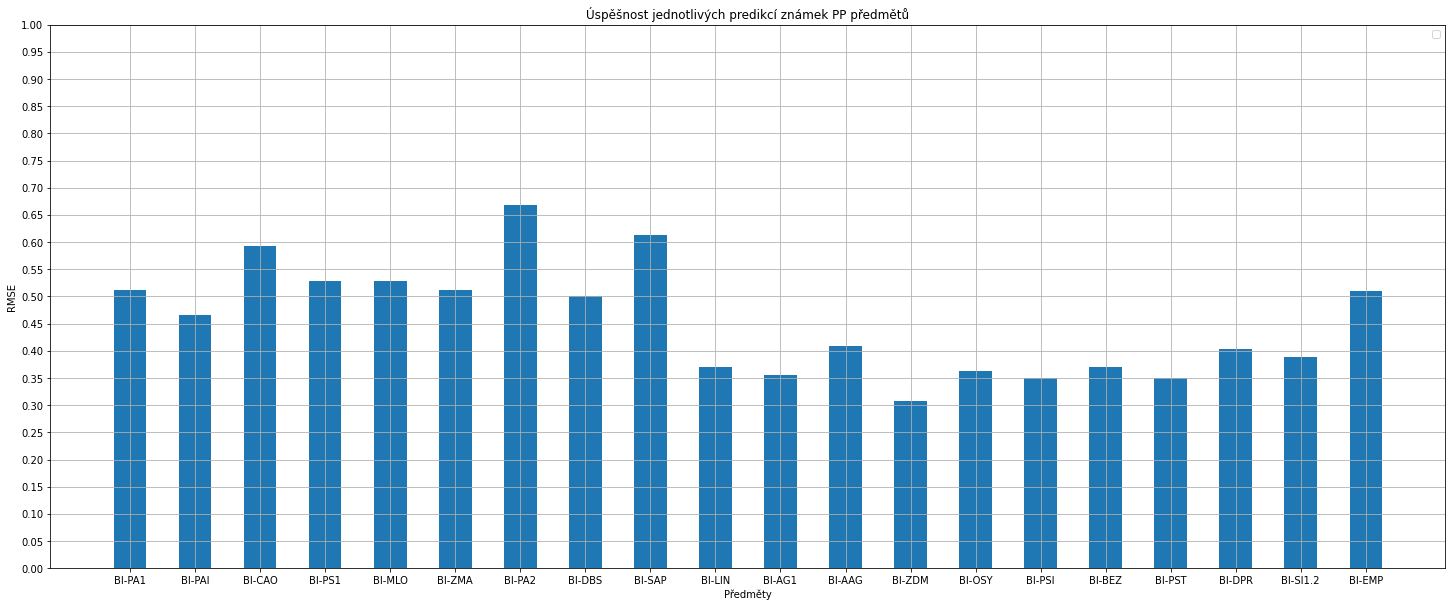

In [114]:
y = [
    test_pa1_err,
    test_pai_err,
    test_cao_err,
    test_ps1_err,
    test_mlo_err,
    test_zma_err,
    test_pa2_err,
    test_dbs_err,
    test_sap_err,
    test_lin_err,
    test_ag1_err,
    test_aag_err,
    test_zdm_err,
    test_osy_err,
    test_psi_err,
    test_bez_err,
    test_pst_err,
    test_dpr_err,
    test_si1_err,
    test_emp_err
]

x = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG', 'BI-ZDM', 'BI-OSY',
       'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR', 'BI-SI1.2', 'BI-EMP']
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , y, width)

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('RMSE')
ax.set_xlabel('Předměty')
ax.set_title('Úspěšnost jednotlivých predikcí známek PP předmětů')
ax.set_xticks(x)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()